## Loosely follows Kaggle's tutorial on predicting house prices in Melbourne, Australia: https://www.kaggle.com/learn/machine-learning (sections 1 to 6)
- Can we find Hawaii's housing information?

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load data into a Pandas dataframe 

#### Pandas is a powerful python data analysis library "providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language"

https://pandas.pydata.org/

#### It totally new to pandas, here is a 10 minute intro to basic, common functionality: http://pandas.pydata.org/pandas-docs/stable/10min.html

In [2]:
## Load data as data frame
melbourne_file_path = '../input/melbourne-housing-snapshot/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 

#### Dataframes are big objects, sometimes you just want a snapshot, for example the top

In [3]:
## show first 5 entries
melbourne_data.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


#### or you want a summary 

In [4]:
## print a summary of the data in Melbourne data
melbourne_data.describe()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,18396.000000,18396.000000,1.839600e+04,18395.000000,18395.000000,14927.000000,14925.000000,14820.000000,13603.000000,7762.000000,8958.000000,15064.000000,15064.000000,18395.000000
mean,11826.787073,2.935040,1.056697e+06,10.389986,3107.140147,2.913043,1.538492,1.615520,558.116371,151.220219,1965.879996,-37.809849,144.996338,7517.975265
std,6800.710448,0.958202,6.419217e+05,6.009050,95.000995,0.964641,0.689311,0.955916,3987.326586,519.188596,37.013261,0.081152,0.106375,4488.416599
min,1.000000,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,5936.750000,2.000000,6.330000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,176.500000,93.000000,1950.000000,-37.858100,144.931193,4294.000000
50%,11820.500000,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803625,145.000920,6567.000000
75%,17734.250000,3.000000,1.302000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,174.000000,2000.000000,-37.756270,145.060000,10331.000000
max,23546.000000,12.000000,9.000000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


### Pandas dataframes have a lot of methods, we recommend googling around and exploring functionality. In the jupyter notebook, putting a ? after a method and "shift+enter" will pop up info about that method, including his sinature call

In [5]:
melbourne_data.Rooms.hist?

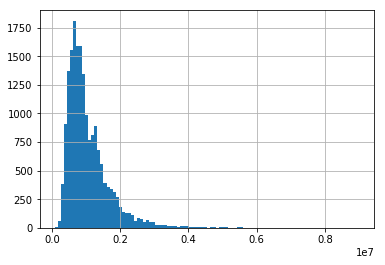

In [6]:
## Price's histogram
melbourne_data.Price.hist(bins=100)

### For simplicity, make Price into a binary variable
## This is not for students. We should binarize other variables as well.

## TODO - Choose which variables we want to be binary and set the split value

In [7]:
melbourne_data.loc?

In [8]:
## use 1 million as the cutoff point
price_mean = 1e+06

## assign categories
category_name = 'PriceBinary'
melbourne_data.loc[melbourne_data.Price >= price_mean, category_name] = '>=1m'
melbourne_data.loc[melbourne_data.Price < price_mean, category_name] = '<1m'

In [9]:
melbourne_data.PriceBinary.describe()

count     18396
unique        2
top         <1m
freq      10845
Name: PriceBinary, dtype: object

In [10]:
## drop Price so there's no information leak/ so the true prices don't predict if it will be greater than or less than a million dollars
melbourne_data = melbourne_data.drop('Price', 1)

In [11]:
melbourne_data.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,PriceBinary
0,1,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,>=1m
1,2,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,>=1m
2,4,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,>=1m
3,5,Abbotsford,40 Federation La,3,h,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,<1m
4,6,Abbotsford,55a Park St,4,h,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,>=1m


### Prediction

#### Y of integer values, size [n_samples], holding the class labels for the training samples

In [12]:
## prediction target
y = melbourne_data.PriceBinary

#### X, sparse or dense, of size [n_samples, n_features] holding the training samples

In [13]:
## predictors
melbourne_predictors = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_predictors]

In [14]:
X.head()

,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
0,2,1.0,202.0,NaN,NaN,-37.7996,144.9984
1,2,1.0,156.0,79.0,1900.0,-37.8079,144.9934
2,3,2.0,134.0,150.0,1900.0,-37.8093,144.9944
3,3,2.0,94.0,NaN,NaN,-37.7969,144.9969
4,4,1.0,120.0,142.0,2014.0,-37.8072,144.9941


In [15]:
## Notice that there are missing values in the data.
## For now we fill them with 0s.

X = X.fillna(0)

#### So we've set up our data set, X is in the N labels we want to use to do the prediction, and y is 1 label we want to predict

#### We will use a prebuilt decision tree classifier from sci kit learn to build a decision tree

#### Scikit Learn is a library for doing Machine Learning in Python. It is a simple and efficient tools for data mining and data analysis, and reusable in various contexts. 

http://scikit-learn.org/stable/

http://scikit-learn.org/stable/modules/tree.html

#### Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

### DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.

### As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, of size [n_samples, n_features] holding the training samples, and an array Y of integer values, size [n_samples], holding the class labels for the training samples:

In [16]:
## Call decision tree classifier from library
from sklearn.tree import DecisionTreeClassifier

# Define model
melbourne_model = DecisionTreeClassifier(criterion='entropy')

# Fit model
melbourne_model.fit(X.fillna(0), y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### After being fitted, the model can then be used to predict the class of samples:

In [17]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude
0      2       1.0     202.0           0.0        0.0   -37.7996    144.9984
1      2       1.0     156.0          79.0     1900.0   -37.8079    144.9934
2      3       2.0     134.0         150.0     1900.0   -37.8093    144.9944
3      3       2.0      94.0           0.0        0.0   -37.7969    144.9969
4      4       1.0     120.0         142.0     2014.0   -37.8072    144.9941
The predictions are
['>=1m' '>=1m' '>=1m' '<1m' '>=1m']


http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

### We want to see how accurate our prediction is given the default values for the classifier, though this is a bit of a cheat because we are using the same data to both build the tree, and then running that data through the tree to predict the y values

## What does it mean that this accuracy is not 100%?

In [18]:
## Calculate accuracy
from sklearn.metrics import accuracy_score

predicted_home_prices = melbourne_model.predict(X)
accuracy_score(y, predicted_home_prices)

0.9547184170471842

### Let's try to be a bit more principled and not use the same data to generate the tree and then try to predict the prices for

### We will split the dataset into a training set to build the decision tree on 

### and a test set, where we'll pretend we don't know the price, predict the price using the decision tree built on the training set, the compare the predicted price to the true price

### splitting data sets into a training set and a test set in a very common operation in machine learning, so sci kit learn has nice funcationality for that 

http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

### why did the accuracy go down?

### The default value for train_size is 0.25, is that low? Play with values? Make training set larger, smaller?


In [19]:
## split train/validate to help with generalization
from sklearn.model_selection import train_test_split

## setting random state allows reproduciability
train_X, val_X, train_y, val_y = train_test_split(X.fillna(0), y, random_state = 42)

# Define model
melbourne_model = DecisionTreeClassifier()

# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)

print(accuracy_score(val_y, val_predictions))

0.8236573168080017


#### We mostly used the default values for the decision tree classifier, but there are many parameters to tweak, sci kit learn just naturally sets them to common values. Here are some of the parameters, but more can be found in the documentation 

criterion : string, optional (default=”gini”)

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

splitter : string, optional (default=”best”)

The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth : int or None, optional (default=None)

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split : int, float, optional (default=2)

The minimum number of samples required to split an internal node:

If int, then consider min_samples_split as the minimum number.
If float, then min_samples_split is a percentage and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
Changed in version 0.18: Added float values for percentages.



## Test the accuracy of your tree as a function of different parameters, for example the maximum depth of your tree 

## Connect depth of tree to how much fitting the tree does

In [20]:
## experiment with different models to find the best performing model

## define a function so it's easier to loop
def get_accuracy_score(max_depth, predictors_train, predictors_val, targ_train, targ_val):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(predictors_train, targ_train)
    preds_val = model.predict(predictors_val)
    accuracy = accuracy_score(targ_val, preds_val)
    return accuracy, model

In [21]:
## compare accuracy with differing values of max_depth

depth_range = range(1, 50, 2) # or use a list such as [1,2,3,4,5,10,50,100,1000]
accuracy_list = []

for max_depth in depth_range:
    my_accuracy, my_model = get_accuracy_score(max_depth, train_X, val_X, train_y, val_y)
    accuracy_list.append(my_accuracy)
    print('max depth:', max_depth, '\t', 'accuracy:', my_accuracy)

max depth: 1 	 accuracy: 0.6438356164383562
max depth: 3 	 accuracy: 0.7747336377473364
max depth: 5 	 accuracy: 0.7945205479452054
max depth: 7 	 accuracy: 0.8182213524679278
max depth: 9 	 accuracy: 0.8253968253968254
max depth: 11 	 accuracy: 0.8303979125896934
max depth: 13 	 accuracy: 0.8362687540769732
max depth: 15 	 accuracy: 0.8360513155033703
max depth: 17 	 accuracy: 0.8284409654272668
max depth: 19 	 accuracy: 0.8297455968688845
max depth: 21 	 accuracy: 0.8249619482496194
max depth: 23 	 accuracy: 0.8267014568384431
max depth: 25 	 accuracy: 0.8214829310719721
max depth: 27 	 accuracy: 0.8212654924983692
max depth: 29 	 accuracy: 0.8212654924983692
max depth: 31 	 accuracy: 0.8212654924983692
max depth: 33 	 accuracy: 0.8212654924983692
max depth: 35 	 accuracy: 0.8212654924983692
max depth: 37 	 accuracy: 0.8212654924983692
max depth: 39 	 accuracy: 0.8212654924983692
max depth: 41 	 accuracy: 0.8212654924983692
max depth: 43 	 accuracy: 0.8212654924983692
max depth: 45 	

In [22]:
len(depth_range), len(accuracy_list)

(25, 25)

## Plot the accuracy as a function of the parameters you vary 

Text(0.5,1,'PriceBinary Accuracy vs. Complexity')

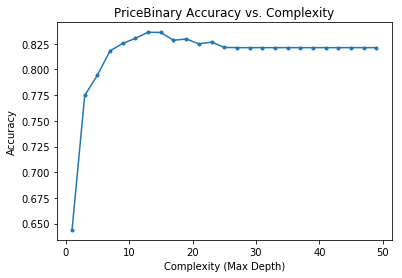

In [23]:
## tradeoff plots
plt.plot(depth_range, accuracy_list, '.-')
plt.xlabel('Complexity (Max Depth)')
plt.ylabel('Accuracy')
plt.title('PriceBinary Accuracy vs. Complexity')

In [24]:
## best accuracy
best_accuracy = max(accuracy_list)

In [25]:
## find corresponding index for best depth
index = accuracy_list.index(max(accuracy_list))
best_max_depth = depth_range[index]

In [26]:
best_accuracy, best_max_depth

(0.8362687540769732, 13)

### The best model has an accuracy of ~0.84 with maximum tree depth of 13 levels

### Visualization of the tree

Once trained, we can export the tree in Graphviz format using the export_graphviz exporter

The export_graphviz exporter also supports a variety of aesthetic options, including coloring nodes by their class (or value for regression) and using explicit variable and class names if desired. 

Jupyter notebooks also render these plots inline automatically:

In [27]:
## Install pydotplus
!pip install pydotplus

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [28]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [29]:
## Create final model with best depth
best_accuracy, best_model = get_accuracy_score(best_max_depth, train_X, val_X, train_y, val_y)

In [30]:
%%time

## creates a png file of the tree
## should take less than 1 min

dot_data = StringIO()
export_graphviz(best_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')

CPU times: user 15.3 s, sys: 405 ms, total: 15.7 s
Wall time: 23.6 s


### See "tree.png" in the same directory.